# Malware Detection using Deep Learning

This notebook aims to build a **Convolutional Neural Network** model to perform a **Detection** of Malwares from the **Malimg Dataset**.

# Data : 
A Malware can belong to one of the following class : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Preprocessing - Converting to images

Raw malwares will be stored in the following folder:

In [3]:
root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\convertTest"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

In [7]:
import sys
import codecs
import os
import math
from math import log
import numpy as np
import scipy as sp
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from androguard.core.bytecodes.apk import APK
from androguard.core.bytecodes import dvm
from androguard.core.analysis import analysis
from matplotlib import cm

#function get bytes from apk
def get_bytes(apk: APK , file_type: str) -> bytes:
    assert file_type in {".dex", ".so", ".xml"}
    for f in apk.get_files():
        if f.endswith(file_type):
            yield apk.get_file(f)

#function that help us to convert our hexadecimal files into png images and save them in the same folder
def generate_png(apk: APK, filename: str, file_type: str):
    assert file_type in {".dex", ".so", ".xml"}
    stream = bytes()
    array = []
    for s in get_bytes(apk, file_type):
        stream += s
        array = np.frombuffer(s, dtype=np.uint8)
    # conversion from binary to hexadecimal
    hex_data = codecs.encode(stream, "hex_codec")

    # deleting leftovers of byte file

    hex_data = str(hex_data)
    hex_data = (hex_data.replace("b'", ""))
    hex_data = (hex_data.replace("'", ""))

    # splitting the previous list in n list of length 6 characters

    long_list = [hex_data[i:i + 6] for i in range(0, len(hex_data), 6)]
    long_list.pop()

    # creation of a new list where RGB code will be stored of each sublist previously created

    colorList = []

    # calculation of RGB code of each sublist

    for element in long_list:
        colorList.append(tuple(int(element[i:i + 2], 16) for i in (0, 2, 4)))

    # creation of a new image of dimension sqrt(len(colorList)

    img_size = int(math.sqrt(len(colorList)))
    print(img_size)

    img = Image.new("RGB", (img_size, img_size))

    pixels = img.load()

    

    # filling matrix with the colors

    for x in range(img_size):
        for y in range(img_size):
            pixels[x, y] = colorList[img_size * x + y]
    image = ImageOps.grayscale(img)
    image = image.rotate(-90)
    image = image.resize((256, 256))
    image.show()
    print(array)
    print(array.shape)
    current_len = len(stream)
    print(current_len)
    print(stream)
    #image = image.resize((1, 64*64), resample=Image.BILINEAR)
   
    
    filename = filename.split('.')[0]
    image.save(root+'\\'+name+'.png', "PNG")

    return image

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+'\\'+name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if ( '.apk' != name[-4:]):
            continue
        f=open(root+'/'+name)
        
        apk = APK(root+'/'+name)
        app_dex = dvm.DalvikOdexVMFormat(apk.get_dex())
        app_x = analysis.Analysis(app_dex)
        print(app_x)
        dex_img = generate_png(apk,root+'/'+name , '.dex')
        #so_img = generate_png(apk,root+'/'+name , '.so')
        #xml_img = generate_png(apk,root+'/'+name , '.xml')
       
        #plt.imshow(dex_img)
        #plt.imshow(so_img)
        #plt.imshow(xml_img)
        #img = mpimg.imread(dex_img)
        #imgplot = plt.imshow(img)
        #plt.show()
        '''
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()
        '''



files :  ['642da73bc4c78004304dfed2e6e704ebb352ff9f1db19a19cc2296c86164e723.apk', '642da73bc4c78004304dfed2e6e704ebb352ff9f1db19a19cc2296c86164e723.apk.png']
<analysis.Analysis VMs: 1, Classes: 19, Strings: 0>
123
[100 101 120 ... 178   0   0]
(45784,)
45784
b'dex\n035\x00\x9c\xe1A(\x0fb\x1e"T\x81 \xe5\xce\xe4\xe3\x83\\p[\xcb\xfa|\x0c\xf5\xd8\xb2\x00\x00p\x00\x00\x00xV4\x12\x00\x00\x00\x00\x00\x00\x00\x00 \xb2\x00\x00\xce\x02\x00\x00p\x00\x00\x00t\x00\x00\x00\xa8\x0b\x00\x00t\x00\x00\x00x\r\x00\x00H\x00\x00\x00\xe8\x12\x00\x00\x11\x01\x00\x00(\x15\x00\x00\x13\x00\x00\x00\xb0\x1d\x00\x00\xc8\x92\x00\x00\x10 \x00\x00\x10 \x00\x00\x12 \x00\x00\x17 \x00\x00& \x00\x00C \x00\x00b \x00\x00\x81 \x00\x00\x84 \x00\x00\x96 \x00\x00\xc0 \x00\x00\xd6 \x00\x00\xe6 \x00\x00\xf0 \x00\x00\x05!\x00\x002!\x00\x008!\x00\x00>!\x00\x00R!\x00\x00b!\x00\x00o!\x00\x00s!\x00\x00\x87!\x00\x00\x9c!\x00\x00\xba!\x00\x00\xd2!\x00\x00\xe0!\x00\x00\x00"\x00\x00\x0e"\x00\x00$"\x00\x00@"\x00\x00X"\x00\x00r"\x00\x00\x82

# Preprocessing - Generate the dataset

Here is our new folder :

In [3]:
path_root = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\MalwareDetection\\malimg_dataset\\train\\dataset_9010\\malimg_dataset\\train\\"

In [8]:
root_2 = "D:\\3.HocTap\\NhapMonATTT\\DoAn_4 - Copy\\malnet-images-tiny\\train\\"

To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : (64*64) images.
  * **batch_size** : Is the size of the batch we will use.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=root_2, target_size=(64,64), batch_size=10000)

Found 32748 images belonging to 25 classes.


In [10]:
batches.class_indices

{'addisplay': 0,
 'adware++adware': 1,
 'adware++virus': 2,
 'backdoor': 3,
 'banker++trojan': 4,
 'click': 5,
 'clicker++trojan': 6,
 'clickfraud++riskware': 7,
 'downloader': 8,
 'dropper++trojan': 9,
 'exploit': 10,
 'fakeangry': 11,
 'fakeapp++trojan': 12,
 'fakeinst++trojan': 13,
 'gray': 14,
 'malware': 15,
 'monitor': 16,
 'ransom++trojan': 17,
 'rootnik++trojan': 18,
 'smssend': 19,
 'spy': 20,
 'spy++trojan': 21,
 'trj': 22,
 'trojandropper': 23,
 'virus': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [11]:
imgs, labels = next(batches)

As you can see, our images are in with shape 64x64 [width x length x depth].

In [12]:
imgs.shape

(10000, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [13]:
labels.shape

(10000, 25)

The following method allows us to plot a sample of images in our dataset.

In [14]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

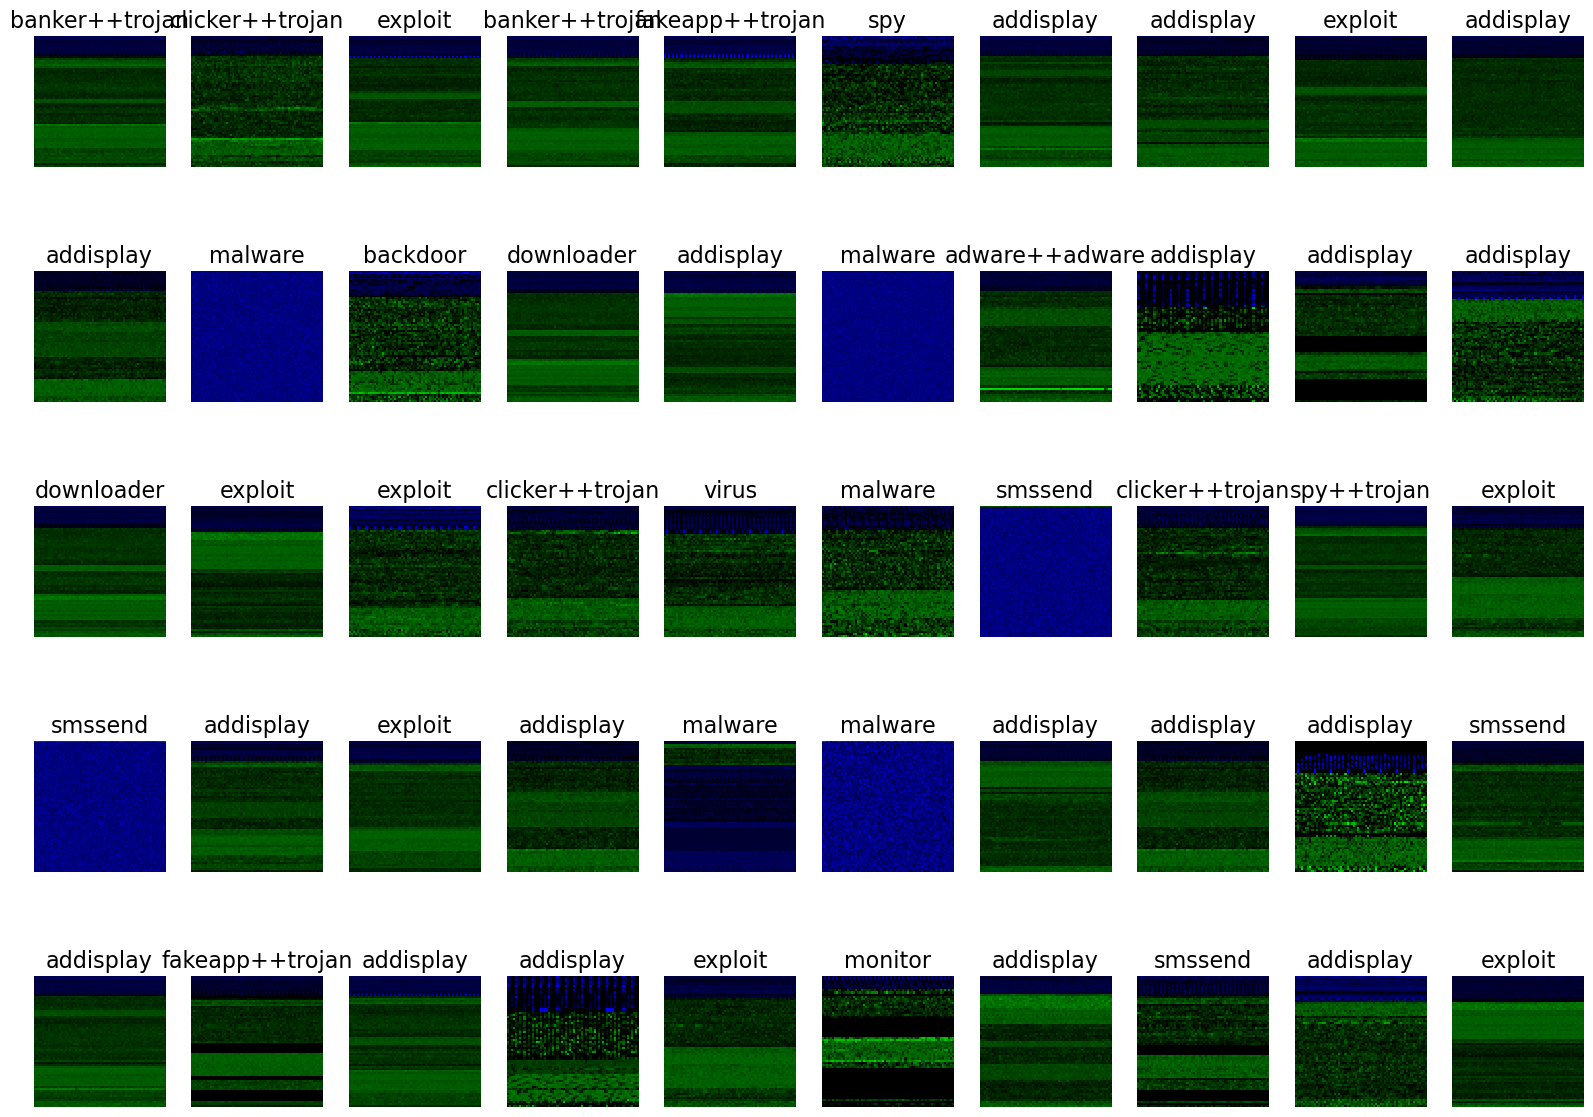

In [15]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [16]:
classes = batches.class_indices.keys()

In [17]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

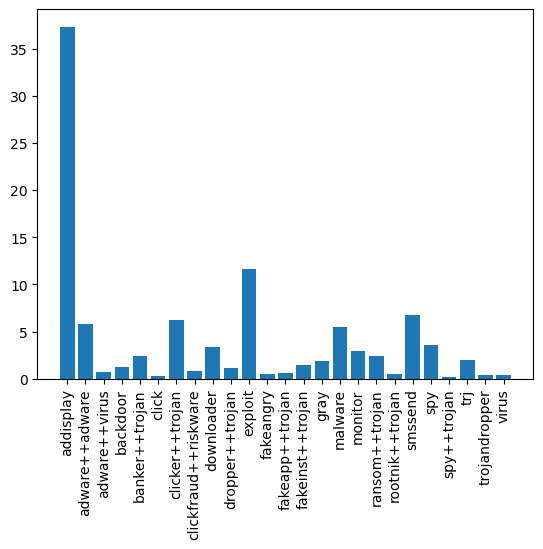

In [18]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

# Train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [16]:
#Change shape of the data
#np.reshape(X_train, (1, 357)) 
#np.reshape(X_test, (1, 357))
#np.reshape(y_train, (1, 357))
#np.reshape(y_test, (1,357))

In [20]:
X_train.shape

(7000, 64, 64, 3)

In [21]:
X_test.shape

(3000, 64, 64, 3)

In [22]:
y_train.shape

(7000, 25)

In [23]:
y_test.shape

(3000, 25)

# Convolutional Neural Network Model

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [24]:
import tensorflow.keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.pooling import GlobalAveragePooling1D



We want **25** classes as output.

In [25]:
num_classes = 25

Building the model

ANN model

In [26]:
def malware_model_ann():
    # Initialising the ANN
    model = Sequential()
    #model.add(Conv2D(30, kernel_size=(3, 3),
    #                 activation='relu',
    #                 input_shape=(64,64,3)))

    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Conv2D(15, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten(input_shape = (64,64,3)))
    # Adding the input layer and the first hidden layer 
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

CNN model

In [27]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

RNN model

In [25]:
def RNN_model():
    model=Sequential();                          
    model.add(LSTM(128, input_shape=(64,64,3), return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# Ko Chay duoc

In [28]:
Malware_model = malware_model()

In [29]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [30]:
y_train.shape

(7000, 25)

In [31]:
y_train_new = np.argmax(y_train, axis=1)

In [32]:
y_train_new

array([9, 1, 0, ..., 0, 7, 0], dtype=int64)

In [33]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                                    class_weight = 'balanced',
                                                    classes = np.unique(y_train_new),
                                                    y = y_train_new
                                                )
class_weights = dict(enumerate(class_weights))

In [37]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

trainModel = Malware_model.fit((X_train), (y_train), epochs=10, validation_data=(X_test, y_test))
 

Epoch 1/10
219/219 [==============================] - 25s 107ms/step - loss: 1.3181 - accuracy: 0.6320 - val_loss: 1.2096 - val_accuracy: 0.6703
Epoch 2/10
219/219 [==============================] - 24s 110ms/step - loss: 1.2038 - accuracy: 0.6580 - val_loss: 1.1558 - val_accuracy: 0.6903
Epoch 3/10
219/219 [==============================] - 14s 66ms/step - loss: 1.1467 - accuracy: 0.6694 - val_loss: 1.1312 - val_accuracy: 0.6937
Epoch 4/10
219/219 [==============================] - 12s 53ms/step - loss: 1.1199 - accuracy: 0.6793 - val_loss: 1.1241 - val_accuracy: 0.6960
Epoch 5/10
219/219 [==============================] - 28s 127ms/step - loss: 1.0936 - accuracy: 0.6873 - val_loss: 1.1201 - val_accuracy: 0.6883
Epoch 6/10
219/219 [==============================] - 26s 121ms/step - loss: 1.0637 - accuracy: 0.6947 - val_loss: 1.0935 - val_accuracy: 0.6963
Epoch 7/10
219/219 [==============================] - 32s 145ms/step - loss: 1.0461 - accuracy: 0.6977 - val_loss: 1.0820 - val_accu

In [38]:
scores = Malware_model.evaluate(X_test, y_test)

94/94 [==============================] - 4s 45ms/step - loss: 1.0890 - accuracy: 0.7040


In [39]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.7039999961853027


In [40]:
trainModel_ann = malware_model_ann().fit((X_train), (y_train), epochs=10, validation_data=(X_test, y_test)) 

Epoch 1/10
219/219 [==============================] - 13s 54ms/step - loss: 2.2663 - accuracy: 0.3914 - val_loss: 1.9348 - val_accuracy: 0.4490
Epoch 2/10
219/219 [==============================] - 11s 51ms/step - loss: 1.9868 - accuracy: 0.4489 - val_loss: 1.7619 - val_accuracy: 0.5597
Epoch 3/10
219/219 [==============================] - 9s 43ms/step - loss: 1.8500 - accuracy: 0.4907 - val_loss: 1.6465 - val_accuracy: 0.5750
Epoch 4/10
219/219 [==============================] - 11s 50ms/step - loss: 1.7762 - accuracy: 0.5114 - val_loss: 1.5596 - val_accuracy: 0.5887
Epoch 5/10
219/219 [==============================] - 8s 39ms/step - loss: 1.7123 - accuracy: 0.5284 - val_loss: 1.5669 - val_accuracy: 0.5953
Epoch 6/10
219/219 [==============================] - 9s 41ms/step - loss: 1.6991 - accuracy: 0.5240 - val_loss: 1.5559 - val_accuracy: 0.5917
Epoch 7/10
219/219 [==============================] - 8s 38ms/step - loss: 1.6815 - accuracy: 0.5171 - val_loss: 1.5234 - val_accuracy: 0.6

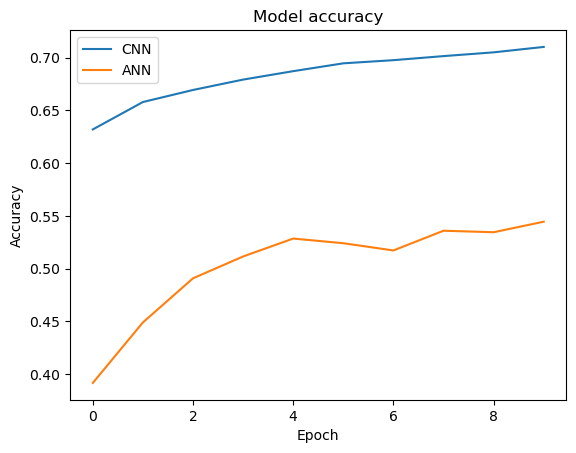

In [41]:
trainModel.history.keys()
plt.plot(trainModel.history['accuracy'])
plt.plot(trainModel_ann.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN', 'ANN'], loc='upper left')
plt.show()

# Confusion Matrix

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred = np.argmax( Malware_model.predict(X_test, verbose=0), axis = 1)

In [ ]:
y_pred

array([ 6,  9,  6, ..., 10, 10, 13], dtype=int64)

In [ ]:
y_test2 = np.argmax(y_test, axis=1)

In [ ]:
y_test2

array([ 6, 15,  6, ..., 10,  0,  0], dtype=int64)

In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

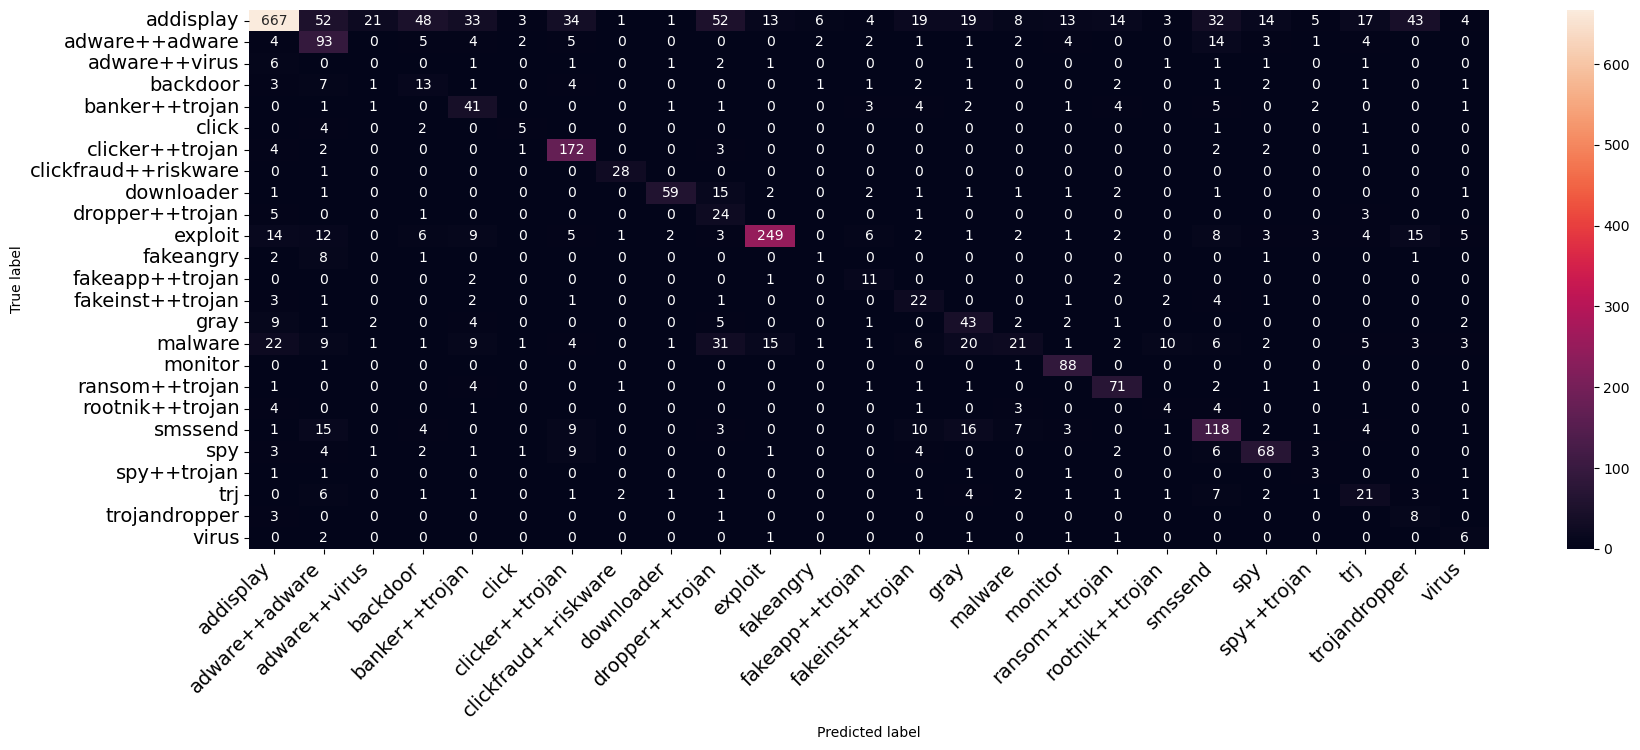

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)